In [39]:
! pip install -r '/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')

# Read and Review the dataset for churn 

### Read csv file

In [6]:
print(os.path.exists("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv"))

True


In [7]:
ds = pd.read_csv("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv")

In [8]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  58 

columns:  ['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice

In [9]:
print('Samples count: ',ds.shape[0])

Samples count:  51047


In [10]:
display(ds.head(5))

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


### Chek missing data

In [11]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [12]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  MonthlyRevenue
Missing data in  MonthlyMinutes
Missing data in  TotalRecurringCharge
Missing data in  DirectorAssistedCalls
Missing data in  OverageMinutes
Missing data in  RoamingCalls
Missing data in  PercChangeMinutes
Missing data in  PercChangeRevenues
Missing data in  ServiceArea
Missing data in  Handsets
Missing data in  HandsetModels
Missing data in  CurrentEquipmentDays
Missing data in  AgeHH1
Missing data in  AgeHH2


In [13]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909


### Unique values count

In [14]:
ds.nunique()

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels       

### Distribution statistics

In [15]:
ds.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


### Values type descriptions

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

#  Different types of the plots examples

#### Нижче наведені приклади побудови графіків та діаграм різних типів. використовуйте їх для аналізу даних

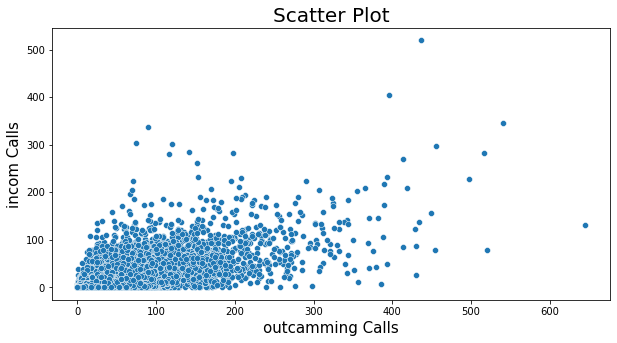

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(ds["OutboundCalls"],ds["InboundCalls"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("outcamming Calls",fontsize=15)
plt.ylabel("incom Calls",fontsize=15)
plt.show()

Порівнявши графіки для користувачів, що покинули компанію та існуючих бачимо - користувачі, що покинули компанію  використовували вихідні дзвінки найчастіше до 150 хв

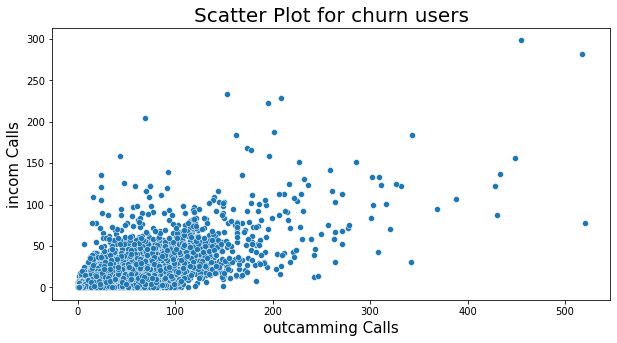

In [18]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(ds[ds['Churn']=='Yes']["OutboundCalls"],ds[ds['Churn']=='Yes']["InboundCalls"],palette = "dark")
plt.title("Scatter Plot for churn users",fontsize=20)
plt.xlabel("outcamming Calls",fontsize=15)
plt.ylabel("incom Calls",fontsize=15)
plt.show()

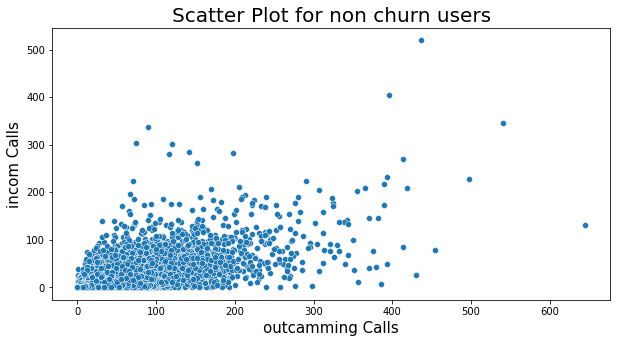

In [19]:
plt.rcParams["figure.figsize"] = (10,5)
sns.scatterplot(ds[ds['Churn']=='No']["OutboundCalls"],ds[ds['Churn']=='No']["InboundCalls"],palette = "dark")
plt.title("Scatter Plot for non churn users",fontsize=20)
plt.xlabel("outcamming Calls",fontsize=15)
plt.ylabel("incom Calls",fontsize=15)
plt.show()

In [20]:
ds.pivot_table(['DroppedCalls', 
                'BlockedCalls', 
                'UnansweredCalls', 
                'CustomerCareCalls', 
                'ThreewayCalls', 
                'ReceivedCalls', 
                'OutboundCalls', 
                'InboundCalls', 
                'PeakCallsInOut', 
                'OffPeakCallsInOut', 
                'DroppedBlockedCalls', 
                'CallForwardingCalls', 
                'CallWaitingCalls'],
               ['Churn'], aggfunc='mean')

,BlockedCalls,CallForwardingCalls,CallWaitingCalls,CustomerCareCalls,DroppedBlockedCalls,DroppedCalls,InboundCalls,OffPeakCallsInOut,OutboundCalls,PeakCallsInOut,ReceivedCalls,ThreewayCalls,UnansweredCalls
Churn,,,,,,,,,,,,,
No,4.124188,0.012825,1.931666,1.984142,10.289303,6.100094,8.541111,70.057714,26.100793,93.222485,118.767558,0.31657,29.014991
Yes,3.990538,0.010924,1.615335,1.584597,9.833696,5.792638,7.281483,61.705717,23.591720,83.947312,105.000598,0.25504,26.495745


In [21]:
dict = {'No':0,'Yes':1}
ds["Churn"] = ds["Churn"].map(dict)

In [22]:
churn_df=ds[ds['Churn']==1]
non_churn_df= ds[ds['Churn']==0]
churned= ds[ds['Churn']==0].shape[0]
notchurned= ds[ds['Churn']==1].shape[0]
print("Total Churned customer {} ".format(churned))

Total Churned customer 36336 


In [23]:
churn_df.tail(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
51031,3399874,1,33.63,28.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,0,No,0,30,No,4-Medium,Other,Other,Unknown
51033,3399882,1,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
51041,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes
51042,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51044,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No


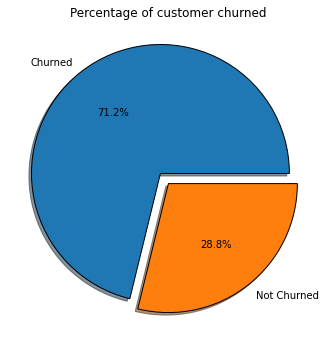

In [24]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of customer churned")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

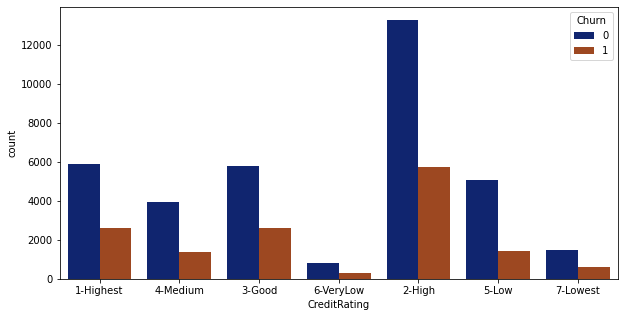

In [25]:
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(ds["CreditRating"],hue = ds["Churn"],palette = "dark")

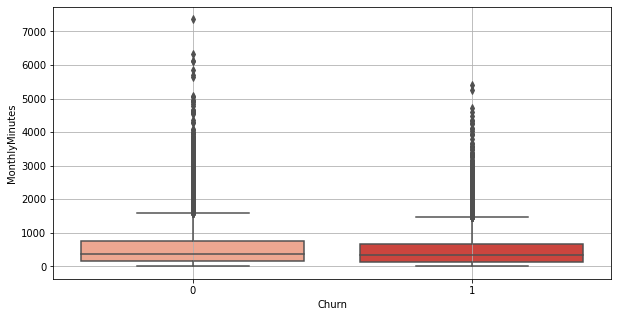

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
sns.boxplot(x=ds["Churn"],y=ds['MonthlyMinutes'],palette = "Reds", ax=ax)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

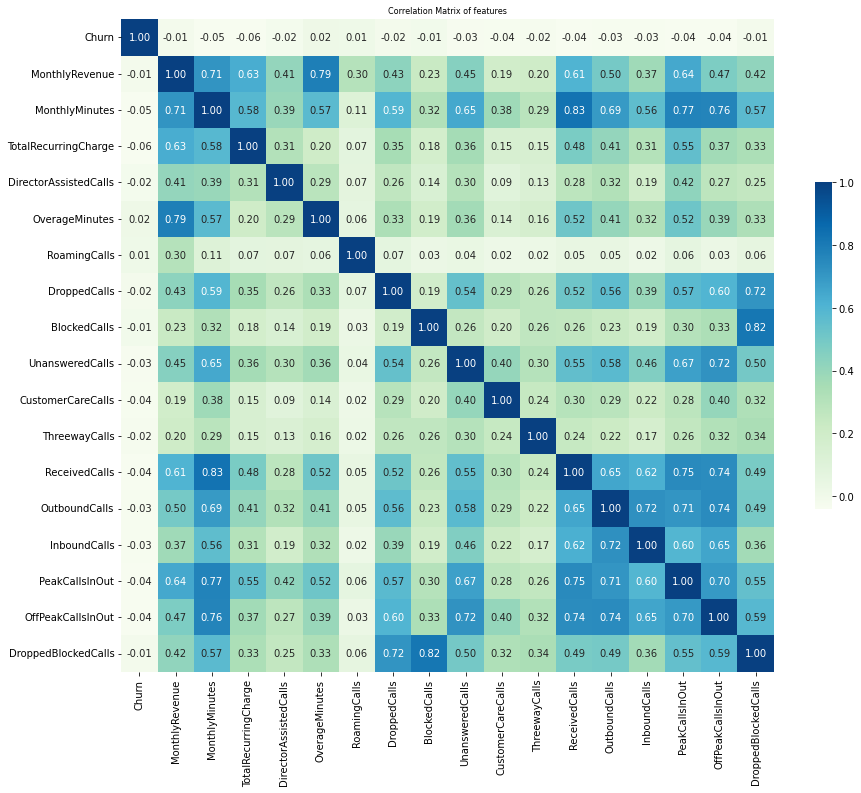

In [27]:
col_for_corr = ['Churn', 
                'MonthlyRevenue', 'MonthlyMinutes', 
                'TotalRecurringCharge', 'DirectorAssistedCalls', 
                'OverageMinutes', 'RoamingCalls', 
                'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 
                'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls']

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

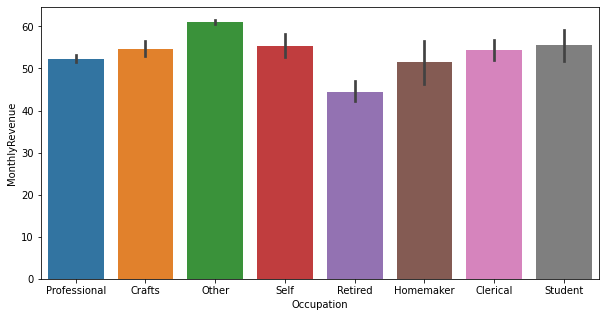

In [28]:

plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["Occupation", "MonthlyRevenue"]]
ax = sns.barplot(x="Occupation", y="MonthlyRevenue", data=graph)

<AxesSubplot:>

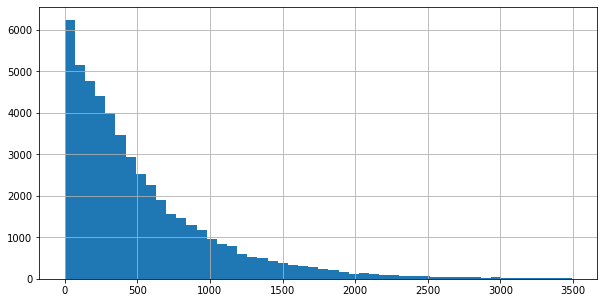

In [29]:
ds[ds['MonthlyMinutes']<3500]['MonthlyMinutes'].hist(bins=50)

<AxesSubplot:>

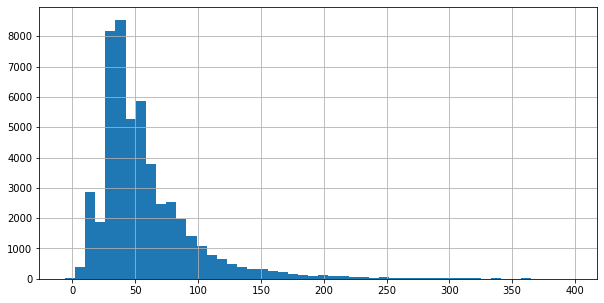

In [30]:
ds[ds['MonthlyRevenue']<400]['MonthlyRevenue'].hist(bins=50)

<AxesSubplot:>

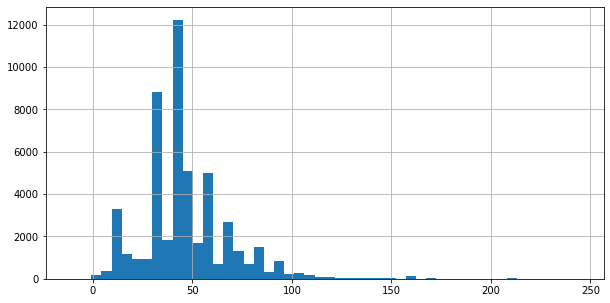

In [31]:
ds[ds['TotalRecurringCharge']<250]['TotalRecurringCharge'].hist(bins=50)

In [32]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(7,7))
    plt.grid(True)
    sns.distplot(df[col][df.Churn == 1])
    sns.distplot(df[col][df.Churn == 0])
    plt.legend(['churn_flag_yes', 'churn_flag_no'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)

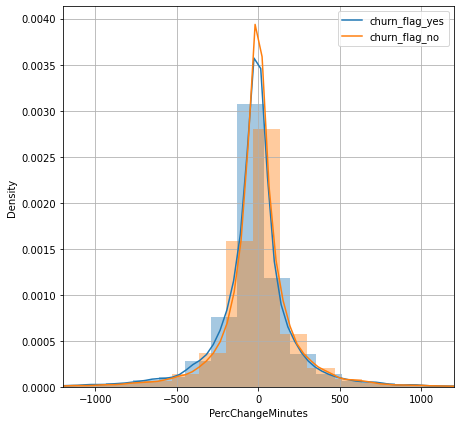

In [33]:
plot_distro(ds, col='PercChangeMinutes', x_limit_r=1200, x_limit_l=-1200)

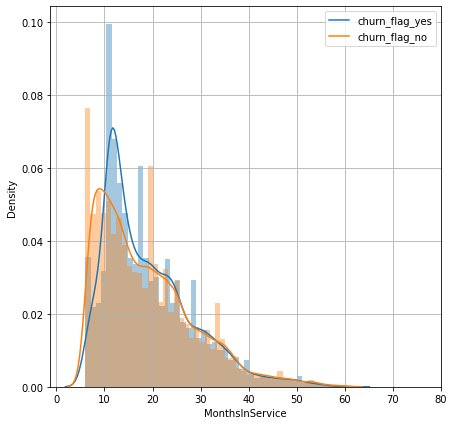

In [34]:
plot_distro(ds, col='MonthsInService', x_limit_r=80)

In [35]:
ds['ChurnSubs']=ds['UniqueSubs']-ds['ActiveSubs']

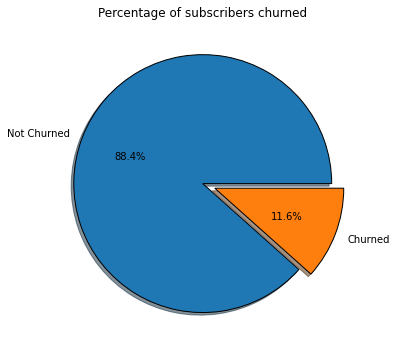

In [36]:
slices=[ds['ActiveSubs'].sum(),ds['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of subscribers churned")
plt.tight_layout()
plt.show()